### problem 1.4

Нет, нельзя, тк у распределения Коши нет моментов. Но мы можем оценить параметр $\theta$ используя выборочную медиану.
По теормеме из условия задачи: выборочная медиана стремится к настояющему значению $\theta$ с полной вероятностью, при увеличении объема выборки.

In [26]:
"""imports"""
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import cauchy

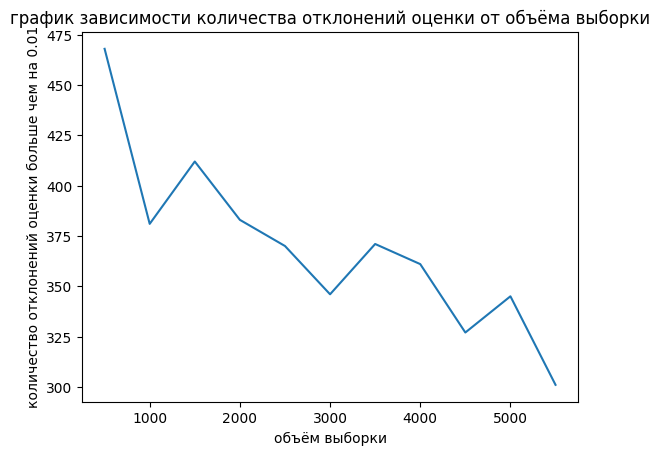

In [46]:
loc = 2
scale = 1
eps = 0.01

samplesSizes = list()
cur = 500
while cur <= 5500:
    samplesSizes.append(cur)
    cur += 500
sampleRejections = list()
for _ in range(len(samplesSizes)):
    sampleRejections.append(0)
medians = list()
for i in range(len(samplesSizes)):
    for j in range(1000):
        sample = cauchy.rvs(loc = loc, scale = scale, size = samplesSizes[i])
        res = (np.median(sample) - loc) > eps
        sampleRejections[i] += res
        if j == 1:
          medians.append(np.median(sample))
plt.plot(samplesSizes, sampleRejections)
plt.title("график зависимости количества отклонений оценки от объёма выборки")
plt.xlabel("объём выборки")
plt.ylabel("количество отклонений оценки больше чем на " + str(eps))
plt.show()

### problem 2.7

Геометрическое распределение основано на схеме Бернулли, значит параметризация будет основана на на количестве проигрышей до первой победы. Пусть геометрическое распределение задачно параметром $\theta$, тогда нетрудно вывести математическое ожидание и дисперсию: $EX = \frac{1}{\theta}$, $Var(X) = \frac{1 - \theta}{\theta^2}$.

Для того чтобы оценить параметр $\theta$ методом моментов используем первый момент, который равен мат ожиданию. Оценка параметра $\theta$ равна $\frac{1}{\not X}$, $\not X$ - выборочное среднее, оценка является несмещенной и состоятельной.

In [47]:
"""imports"""
import numpy as np
import matplotlib.pyplot as plt

In [48]:
theta = 0.3
eps = 0.01
samplesCount = 500
samplesSizes = [50, 100, 500, 1000, 2500]

np.random.seed(1234)

In [49]:
thetaEvaluation = list()
for size in samplesSizes:
    eval = list()
    for _ in range(samplesCount):
        eval.append(1.0 / np.mean(np.random.geometric(p = theta, size = size)))
    thetaEvaluation.append(eval)

In [50]:
rejection = np.abs(np.subtract(thetaEvaluation, theta))
rejectionCount = np.sum(rejection > eps, axis = 1)

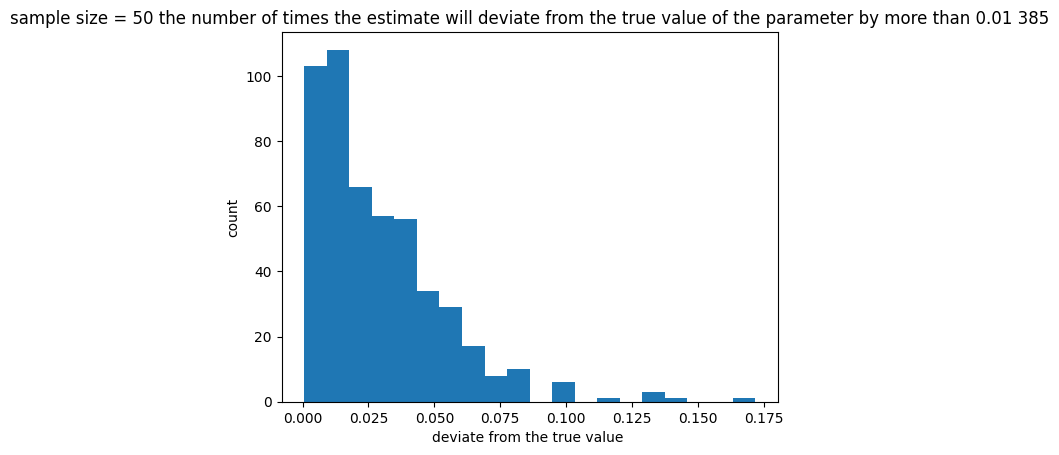

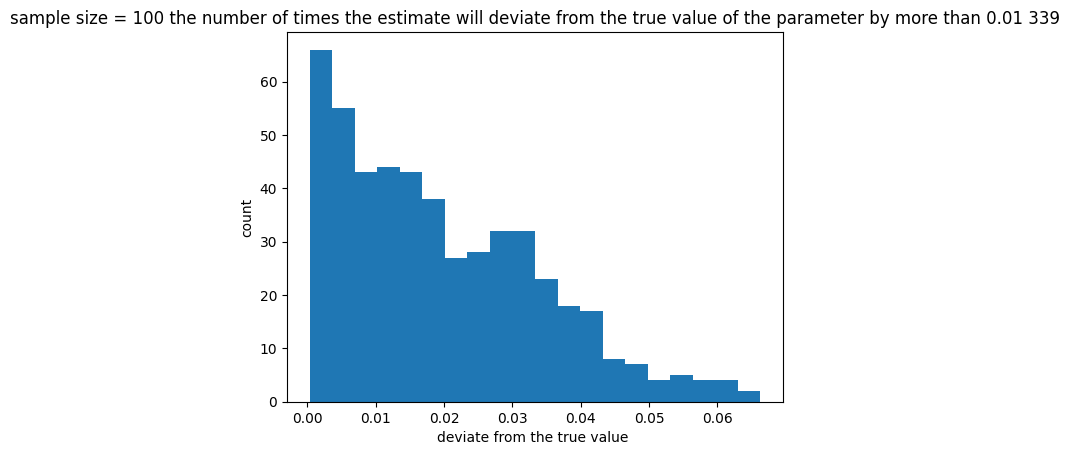

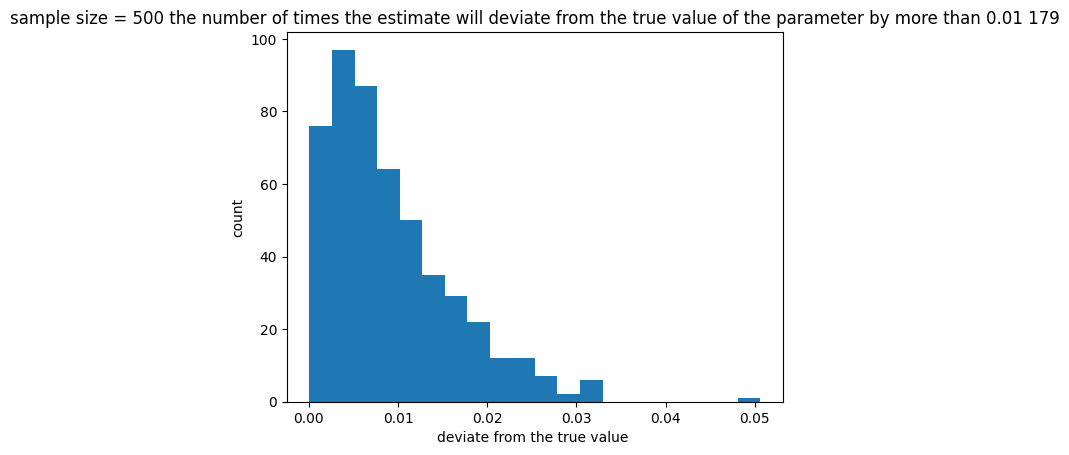

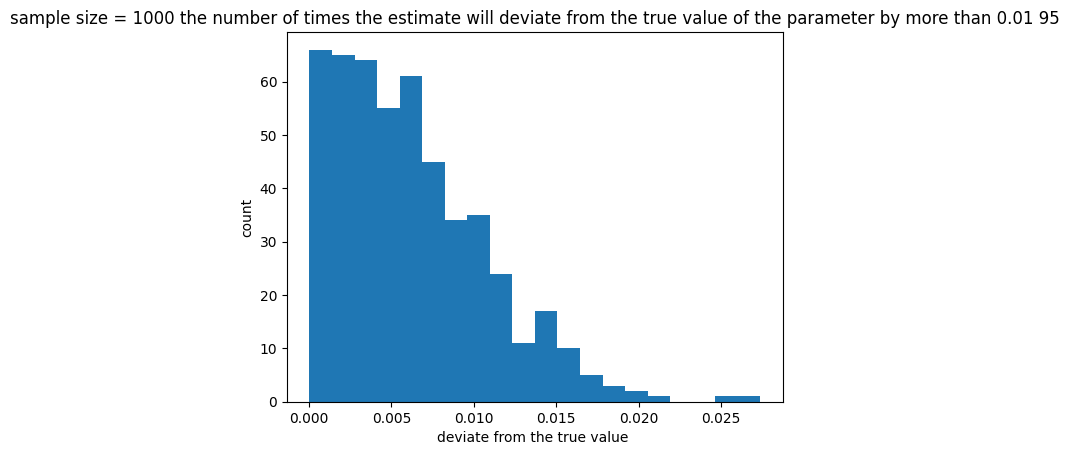

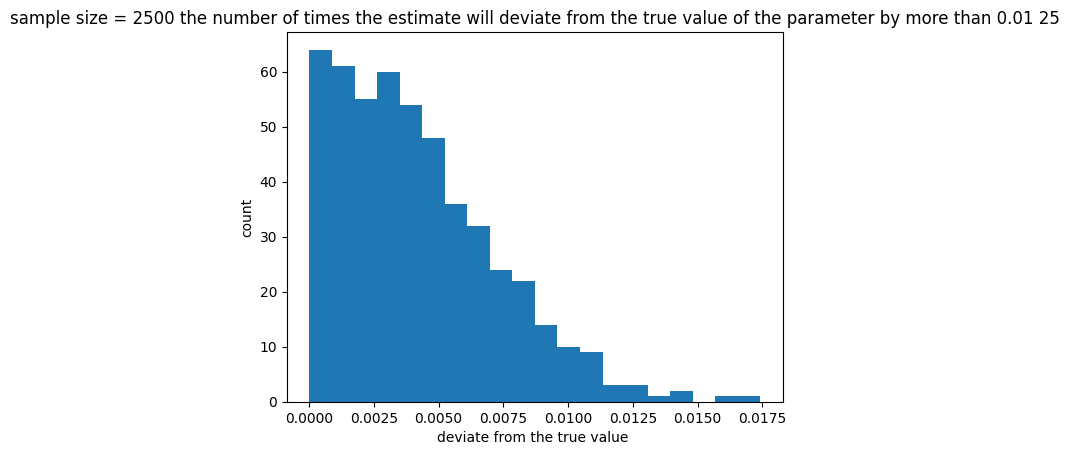

In [51]:
i = 0
for size in samplesSizes:
    plt.figure()
    plt.hist(rejection[i], bins = 20)
    plt.title("sample size = " + str(size) + " the number of times the estimate will deviate from the true value of the parameter by more than " + str(eps) + " " + str(rejectionCount[i]))
    plt.xlabel("deviate from the true value ")
    plt.ylabel("count")
    plt.show()
    i += 1